# Auditing $f$-DP Curve for the DP-SGD Mechanism 

## Description

This notebook demonstrates how to use the auditor API to audit a claimed tradeoff curve for the DP-SGD Mechanism.

### Step 1: Import Packages

In [1]:
import numpy as np
import os
import sys
import time
import logging
import matplotlib.pyplot as plt

# Navigate to the parent directory of the project structure
project_dir = os.path.abspath(os.path.join(os.getcwd(), '../..'))
src_dir = os.path.join(project_dir, 'src')
log_dir = os.path.join(project_dir, 'log')
fig_dir = os.path.join(project_dir, 'fig')
os.makedirs(fig_dir, exist_ok=True)
os.makedirs(log_dir, exist_ok=True)
logfile_path = os.path.join(log_dir, 'auditing-SGD.log')

# Add the src directory to sys.path
sys.path.append(src_dir)

from analysis.tradeoff_toyDPSGD import toyDPSGD_compute_tradeoff_curve
from analysis.accuracy_analysis import create_plot, knn_baybox_acc_bound_1d
from functools import partial

from mech.toy_DPSGD import *

### Step 2: Instantiate the $f$-DP Auditor for DP-SGD Mechanism

In [6]:
logging.basicConfig(
    level=logging.INFO,
    format="%(asctime)s %(message)s",
    handlers=[
        logging.FileHandler(logfile_path)
        # logging.StreamHandler()
    ]
)
num_train_samples=1000000
kwargs = generate_params(num_train_samples, num_test_samples=1000000)
claimed_f = kwargs["claimed_f"]
auditor = toy_DPSGDPAuditor(kwargs)

### Step 3: Auditing and Report

In [3]:
output = auditor.build()

In [4]:
output["Report"] 

'No Violation'

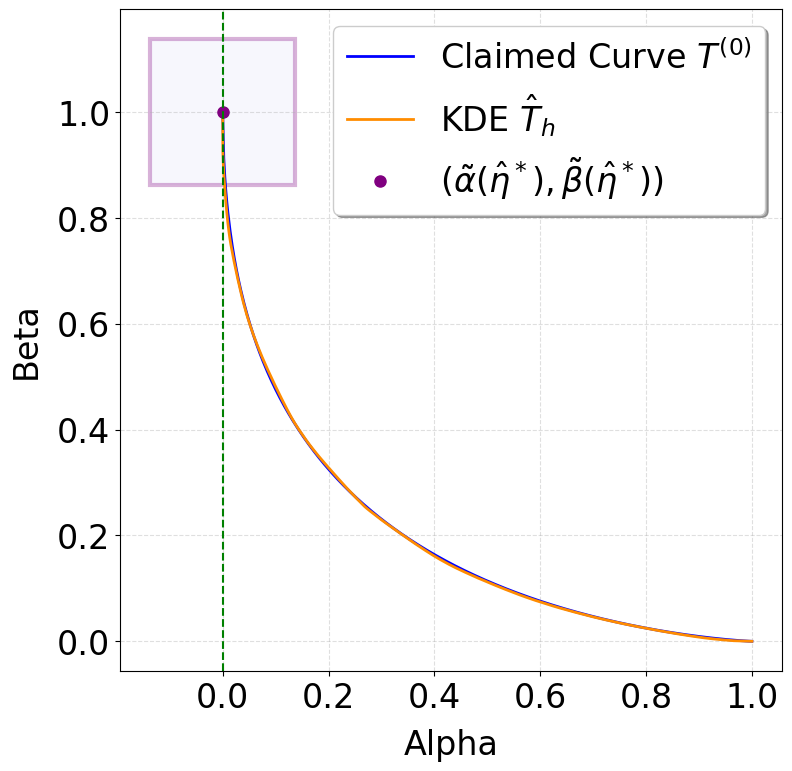

In [7]:
omega=knn_baybox_acc_bound_1d(num_train_samples, kwargs["gamma"])
file_name = os.path.join(fig_dir, 'auditing_sgd_108.png')

create_plot(omega, output["estimated_alpha"], output["estimated_beta"], np.linspace(0,1,500), output["scan_alpha"], output["scan_beta"], output["critical_alpha"], output["critical_beta"], file_name, claimed_f)